# Linear Regression using Gradient Descent

## Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Import Dataset

In [2]:
train_data = pd.read_csv('ex1data2_train.csv')
train_data.head()

,area,bedroom,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
area       47 non-null int64
bedroom    47 non-null int64
price      47 non-null int64
dtypes: int64(3)
memory usage: 1.2 KB


In [4]:
train_data.describe()

,area,bedroom,price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [5]:
test_data = pd.read_csv('ex1data2_test.csv')
test_data.head()

,area,bedroom
0,1650,3


## Feature Sepration and Normalization

In [6]:
X_train = train_data.iloc[:, :-1].values
X_test = test_data.iloc[:, :].values
y_train = train_data.iloc[:, -1:].values
m = y_train.shape[0]

train_data_mean = train_data.mean(0)
train_data_std = train_data.std(0)

X_train_mean = train_data_mean[0:2].values
X_train_std = train_data_std[0:2].values
X_train_norm = (X_train - X_train_mean)/X_train_std

X_test_norm = (X_test - X_train_mean)/X_train_std

## Add Intercept Term to Features

In [7]:
train_ones = np.ones((X_train_norm.shape[0], 1))
test_ones = np.ones((X_test_norm.shape[0], 1))
X_train_norm = np.column_stack((train_ones, X_train_norm))
X_test_norm = np.column_stack((test_ones, X_test_norm))

## Perform Gradient Descent

### Compute Cost

In [8]:
def compute_cost(X, y, theta):
    hx = np.matmul(X, theta)
    error_values = hx - y
    squared_error = np.square(error_values)
    cost = np.sum(squared_error, 0)
    return cost

### Gradient Descent

In [9]:
def gradient_descent(X, y, theta, alpha, iterations):
    iteration_array = np.array([itr for itr in range(iterations)])
    cost_history = []
    for iteration in range(iterations):
        hx = np.matmul(X, theta)
        error_value = hx - y
        error_value_multi = np.matmul(error_value.T, X)
        delta = np.multiply(error_value_multi.T,(alpha/m))
        theta = theta - delta
        cost_history.append(compute_cost(X, y, theta))
    return [theta, np.column_stack((iteration_array, np.asarray(cost_history)))]

### Use Gradient Descent

In [10]:
alpha = 0.01
num_iterations = 400
theta = np.zeros((X_train_norm.shape[1],1))
theta, cost_history = gradient_descent(X_train_norm, y_train, theta, alpha, num_iterations)
result = np.matmul(X_test_norm, theta)
print(result)

[[289314.62033778]]


## Graphs

## Train Data

### Cost Function

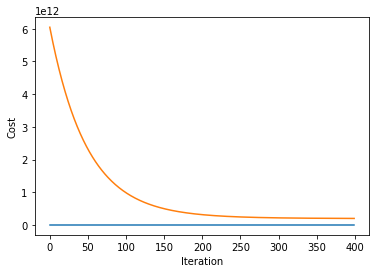

In [11]:
plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()